<a href="https://colab.research.google.com/github/CatalinaOrtegha/3rdChallenge-TelecomX/blob/main/3rdChallenge_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np

In [41]:
url = 'https://raw.githubusercontent.com/CatalinaOrtegha/2ndChallenge_TelecomX/refs/heads/main/df_limpio_telecomX_actualizacion.json'
data = pd.read_json(url)
data

,rotacion_cliente,genero_cliente,de_tercera_edad,tiene_pareja,tiene_dependientes,meses_contrato,tipo_contrato,metodo_pago,total_gastos_por_mes,total_gastos,cuentas_diarias
0,False,Mujeres,False,True,True,9,Anual,Cheque por correo,65.60,593.30,2.19
1,False,Hombres,False,False,False,9,Mensual,Cheque por correo,59.90,542.40,2.00
2,True,Hombres,False,False,False,4,Mensual,Cheque electrónico,73.90,280.85,2.46
3,True,Hombres,True,True,False,13,Mensual,Cheque electrónico,98.00,1237.85,3.27
4,True,Mujeres,True,True,False,3,Mensual,Cheque por correo,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...
7262,False,Mujeres,False,False,False,13,Anual,Cheque por correo,55.15,742.90,1.84
7263,True,Hombres,False,True,False,22,Mensual,Cheque electrónico,85.10,1873.70,2.84
7264,False,Hombres,False,False,False,2,Mensual,Cheque por correo,50.30,92.75,1.68
7265,False,Hombres,False,True,True,67,Bienal,Cheque por correo,67.85,4627.65,2.26


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rotacion_cliente      7032 non-null   bool   
 1   genero_cliente        7032 non-null   object 
 2   de_tercera_edad       7032 non-null   bool   
 3   tiene_pareja          7032 non-null   bool   
 4   tiene_dependientes    7032 non-null   bool   
 5   meses_contrato        7032 non-null   int64  
 6   tipo_contrato         7032 non-null   object 
 7   metodo_pago           7032 non-null   object 
 8   total_gastos_por_mes  7032 non-null   float64
 9   total_gastos          7032 non-null   float64
 10  cuentas_diarias       7032 non-null   float64
dtypes: bool(4), float64(3), int64(1), object(3)
memory usage: 467.0+ KB


In [43]:
numerica = data.drop(["rotacion_cliente","genero_cliente","de_tercera_edad","tiene_pareja","tiene_dependientes","tipo_contrato","metodo_pago"], axis=1)
numerica.head(10)

,meses_contrato,total_gastos_por_mes,total_gastos,cuentas_diarias
0,9,65.60,593.30,2.19
1,9,59.90,542.40,2.00
2,4,73.90,280.85,2.46
3,13,98.00,1237.85,3.27
4,3,83.90,267.40,2.80
5,9,69.40,571.45,2.31
6,71,109.70,7904.25,3.66
7,63,84.65,5377.80,2.82
8,7,48.20,340.35,1.61
9,65,90.45,5957.90,3.02


In [44]:
categorica = data.filter(["rotacion_cliente","genero_cliente","de_tercera_edad","tiene_pareja","tiene_dependientes","tipo_contrato","metodo_pago"])
categorica.head()

,rotacion_cliente,genero_cliente,de_tercera_edad,tiene_pareja,tiene_dependientes,tipo_contrato,metodo_pago
0,False,Mujeres,False,True,True,Anual,Cheque por correo
1,False,Hombres,False,False,False,Mensual,Cheque por correo
2,True,Hombres,False,False,False,Mensual,Cheque electrónico
3,True,Hombres,True,True,False,Mensual,Cheque electrónico
4,True,Mujeres,True,True,False,Mensual,Cheque por correo


In [45]:
cat_numerical = pd.get_dummies(categorica, drop_first=True, dtype=int)
cat_numerical

,rotacion_cliente,de_tercera_edad,tiene_pareja,tiene_dependientes,genero_cliente_Mujeres,tipo_contrato_Bienal,tipo_contrato_Mensual,metodo_pago_Cheque por correo,metodo_pago_Crédito automático,metodo_pago_Transferencia bancaria automática
0,False,False,True,True,1,0,0,1,0,0
1,False,False,False,False,0,0,1,1,0,0
2,True,False,False,False,0,0,1,0,0,0
3,True,True,True,False,0,0,1,0,0,0
4,True,True,True,False,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7262,False,False,False,False,1,0,0,1,0,0
7263,True,False,True,False,0,0,1,0,0,0
7264,False,False,False,False,0,0,1,1,0,0
7265,False,False,True,True,0,1,0,1,0,0


In [46]:
boolean = ["rotacion_cliente","de_tercera_edad",
           "tiene_pareja","tiene_dependientes"]

cat_numerical[boolean] = cat_numerical[boolean].astype(int)


In [47]:
cat_numerical.head()

,rotacion_cliente,de_tercera_edad,tiene_pareja,tiene_dependientes,genero_cliente_Mujeres,tipo_contrato_Bienal,tipo_contrato_Mensual,metodo_pago_Cheque por correo,metodo_pago_Crédito automático,metodo_pago_Transferencia bancaria automática
0,0,0,1,1,1,0,0,1,0,0
1,0,0,0,0,0,0,1,1,0,0
2,1,0,0,0,0,0,1,0,0,0
3,1,1,1,0,0,0,1,0,0,0
4,1,1,1,0,1,0,1,1,0,0


In [48]:
cat_numerical.tail()

,rotacion_cliente,de_tercera_edad,tiene_pareja,tiene_dependientes,genero_cliente_Mujeres,tipo_contrato_Bienal,tipo_contrato_Mensual,metodo_pago_Cheque por correo,metodo_pago_Crédito automático,metodo_pago_Transferencia bancaria automática
7262,0,0,0,0,1,0,0,1,0,0
7263,1,0,1,0,0,0,1,0,0,0
7264,0,0,0,0,0,0,1,1,0,0
7265,0,0,1,1,0,1,0,1,0,0
7266,0,0,1,1,0,1,0,0,0,0


In [49]:
df=cat_numerical
df

,rotacion_cliente,de_tercera_edad,tiene_pareja,tiene_dependientes,genero_cliente_Mujeres,tipo_contrato_Bienal,tipo_contrato_Mensual,metodo_pago_Cheque por correo,metodo_pago_Crédito automático,metodo_pago_Transferencia bancaria automática
0,0,0,1,1,1,0,0,1,0,0
1,0,0,0,0,0,0,1,1,0,0
2,1,0,0,0,0,0,1,0,0,0
3,1,1,1,0,0,0,1,0,0,0
4,1,1,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,1,0,0,1,0,0
7263,1,0,1,0,0,0,1,0,0,0
7264,0,0,0,0,0,0,1,1,0,0
7265,0,0,1,1,0,1,0,1,0,0


In [50]:
df['rotacion_cliente'].value_counts(normalize=True).round(2)

,proportion
rotacion_cliente,
0,0.73
1,0.27


In [54]:
activos=df['rotacion_cliente'].value_counts(normalize=True)[0].round(2)
activos


np.float64(0.73)

In [55]:
cancelaron=df['rotacion_cliente'].value_counts(normalize=True)[1].round(2)
cancelaron

np.float64(0.27)

In [58]:
proporcion=(cancelaron/activos).round(2)
proporcion

#aprox. 1 cliente cancela por cada 2.7 activos

np.float64(0.37)

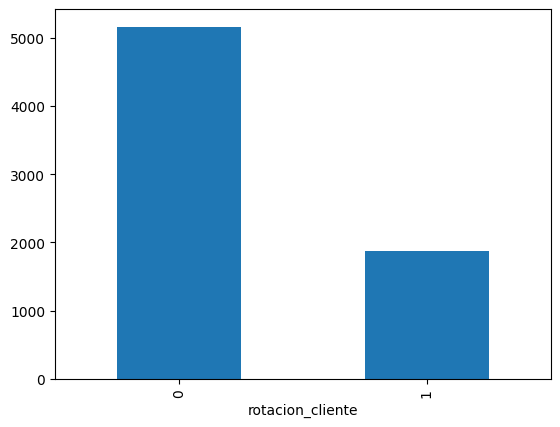

In [53]:
df['rotacion_cliente'].value_counts().plot(kind='bar');